$$ \textbf{EE0826 Control Systems} $$

$$ \textbf{Simulation 3} $$

$$ \textbf{Effect of pole distance to impulse and step responses} $$

$$ \text{Prepared by: Güray Gürkan, PhD} $$

$$ \text{Jan, 2019} $$


# Comparison of $1^{st}$ order systems in terms of response quickness

Consider two 1st order systems with given pole-zero maps.


Populating the interactive namespace from numpy and matplotlib


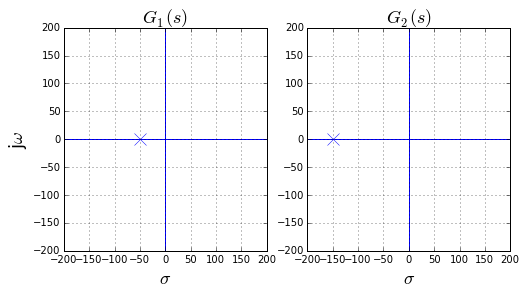

In [9]:
%pylab inline
figure(figsize=(8,4))
subplot(1,2,1)
plot(-50,0,'x',markersize=12)
plot([-200,200],[0,0],'b')
plot([0,0],[-200,200],'b')
axis([-200,200,-200,200])
grid(True)
xlabel('$\sigma $',fontsize=18)
ylabel('j$\omega $',fontsize=18)
title('$G_1(s)$',fontsize=18)

subplot(1,2,2)
plot([-200,200],[0,0],'b')
plot([0,0],[-200,200],'b')
plot(-150,0,'x',markersize=12)
axis([-200,200,-200,200])
grid(True)
xlabel('$\sigma $',fontsize=18)
title('$G_2(s)$',fontsize=18)


We can generate the systems as:

In [11]:
import control as ctl
G1 = ctl.tf(1,[1, 50])
G2 = ctl.tf(1,[1, 150])
print 'G1(s) =', G1
print 'G2(s) =', G2

G1(s) = 
   1
------
s + 50

G2(s) = 
   1
-------
s + 150



## Impulse Responses
The impulse responses are:

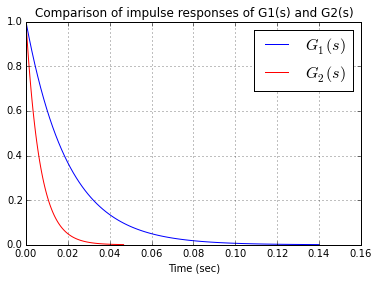

In [15]:
h1,t1 = ctl.impulse(G1)
h2,t2 = ctl.impulse(G2)

plot(t1,h1)
plot(t2,h2,'r')
grid();
title('Comparison of impulse responses of G1(s) and G2(s)')
legend(('$G_1(s)$','$G_2(s)$'),fontsize = 16)
xlabel('Time (sec)')

From the impulse responses, we can state that the system with pole closer to the origin is slower than the other one. In other words, as the poles of the system gets far from origin, the system becomes quicker.


## Step Responses:

For the current states of the transfer functions, the unit step response can be simulated as follows:

(0, 0.03)

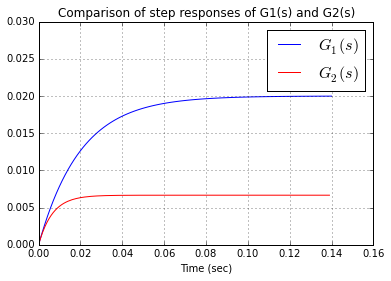

In [18]:
y1,t1 = ctl.step(G1)
y2,t2 = ctl.step(G2,arange(0,t1[-1],.001))

plot(t1,y1)
plot(t2,y2,'r')
grid();
title('Comparison of step responses of G1(s) and G2(s)')
legend(('$G_1(s)$','$G_2(s)$'),fontsize = 16)
xlabel('Time (sec)')
ylim(0,.03)

It is clear that the final values of systems are different. This can be verified via Final Value Theorem:

$$ \lim_{t \to \infty} y(t) = \lim_{s \to 0} G(s)=G(0)$$

For $G_1(s)$, we have $$G_1(0)= \frac{1}{0+50} = 0.02 $$;

For $G_2(s)$, we have $$G_2(0)= \frac{1}{0+150} =0.0066 $$

Since the final values are different, it may be misleading to judge the quickness of the systems. For this, we should first ensure equal final values.


In general, for a first order system with gain term $K$ and pole at $ s= -p \in R$,
$$ G(s) = \frac{K} {s+p} $$
the final value of the step response is
$$ G(0) = \frac{K}{0+p}=\frac{K}{p} $$
Thus, for a first order system to have a unit DC gain for unit-step response, we have
$$ K = \|p\|$$

Then, the systems:
$$G_1(s) = \frac{50}{s+50} $$
and
$$G_2(s) = \frac{150}{s+150} $$
will have the same final value of 1.




(0, 1.3)

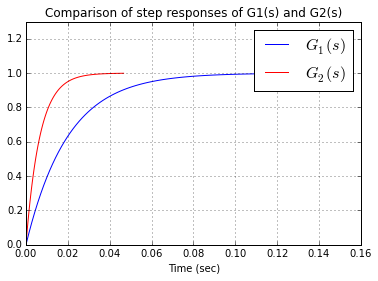

In [19]:
G1 = 50*G1
G2 = 150*G2
y1,t1 = ctl.step(G1)
y2,t2 = ctl.step(G2)

plot(t1,y1)
plot(t2,y2,'r')
grid();
title('Comparison of step responses of G1(s) and G2(s)')
legend(('$G_1(s)$','$G_2(s)$'),fontsize = 16)
xlabel('Time (sec)')
ylim(0,1.3)

Now we can state that $G_2(s)$ has a quicker step response.

### Parallel Connection: Quickness observations

Consider we connect G1(s) and G2(s) in parallel:

$$ G_p(s) = G_1(s)+ G_2(s) $$

The final value of the step response of this new system is:

$$ \lim_{t \to \infty} y_p(t) = \lim_{s \to 0} G_p(s)=G_p(0)$$

$$ G_p(0)= G_1(0) + G_2(0)$$

$$ G_p(0) = 1 + 1 = 2 $$

Thus, to make a a good comparison about quickness, we should generate the parallel system as:

$$ G_p(s) = 0.5 (G_1(s)+ G_2(s)) $$

This system has a final value of 1.

(0, 1.2)

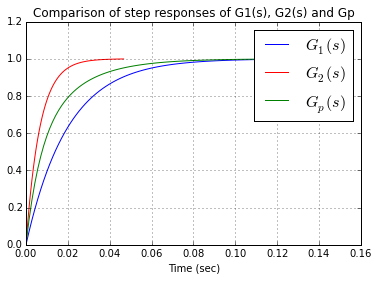

In [22]:
Gp = 0.5*(G1+G2)

y3,t3 = ctl.step(Gp)
plot(t1,y1)
plot(t2,y2,'r')
plot(t3,y3,'g')
grid();
title('Comparison of step responses of G1(s), G2(s) and Gp')
legend(('$G_1(s)$','$G_2(s)$','$G_p(s)$'),fontsize=16);
xlabel('Time (sec)')
ylim(0,1.2)

### Cascade Connection: Quickness observations

Now consider we connect G1(s) and G2(s) in cascade:

$$ G_p(s) = G_1(s) * G_2(s) $$

This time, the final value of the new system is
already 1.

(0, 1.2)

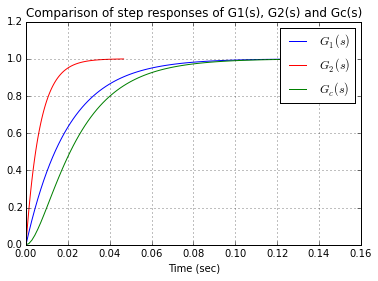

In [23]:
Gc = G1*G2

y4,t4 = ctl.step(Gc)
plot(t1,y1)
plot(t2,y2,'r')
plot(t4,y4,'g')
grid();
title('Comparison of step responses of G1(s), G2(s) and Gc(s)')
legend(('$G_1(s)$','$G_2(s)$','$G_c(s)$'));
xlabel('Time (sec)')
ylim(0,1.2)

As a general result, the cascade connection of two systems generates a system that is slower than both systems whereas, connection of two systems in parallel generates a system that is slower than the quickest system.